# TOP 500 supercomputer mining - Challenge 2

In this challenge use Pandas to read the search results data in your MySQL table. Create a DataFrame that contains all the search results, then generate a data visualization plot (or several) from the DataFrame.

Try to answer the following questions:

* Is there a relationship between year and consumed power?
* And between power and cores?
* Which is the company with more supercomputers?
* Which country have more computacional power?
* The computacional power has increased over the years?

In [1]:
# Your code here

In [2]:
import mysql.connector 
import pandas as pd                   
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
db = mysql.connector.connect(host='localhost', user='admin', passwd='password', database='SuperComputers')

cursor = db.cursor()

cursor.execute('select * from top_500')

data = cursor.fetchall()


In [4]:
df = pd.DataFrame(data, columns=cursor.column_names)

print ('Data readed from MySQL.')

display (df.head())

Data readed from MySQL.


,ranking,name,year,description,company,country,cores,rmax,rpeak,power
0,1,Tianhe-2A,2014,National Super Computer Center in Guangzhou Cl...,NUDT,China,3120000,33862.7,54902.4,17808
1,2,Titan,2014,DOE/SC/Oak Ridge National Laboratory XK7 Opte...,Cray Inc.,United States,560640,17590.0,27112.5,8209
2,3,Sequoia,2014,DOE/NNSA/LLNL BlueGene/Q Power BQC 16C 1.60 G...,IBM,United States,1572864,17173.2,20132.7,7890
3,4,K computer,2014,RIKEN Advanced Institute for Computational Sci...,Fujitsu,Japan,705024,10510.0,11280.4,12660
4,5,Mira,2014,DOE/SC/Argonne National Laboratory BlueGene/Q ...,IBM,United States,786432,8586.6,10066.3,3945


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
ranking        2500 non-null int64
name           2500 non-null object
year           2500 non-null int64
description    2500 non-null object
company        2500 non-null object
country        2500 non-null object
cores          2500 non-null int64
rmax           2500 non-null float64
rpeak          2500 non-null float64
power          2500 non-null int64
dtypes: float64(2), int64(4), object(4)
memory usage: 195.4+ KB


In [6]:
df.describe()

,ranking,year,cores,rmax,rpeak,power
count,2500.000000,2500.000000,2.500000e+03,2500.000000,2500.000000,2500.000000
mean,250.500000,2016.000000,8.964236e+04,1463.265360,2262.270280,959.638000
std,144.366155,1.414496,5.771423e+05,5371.739049,7649.023042,1920.819322
min,1.000000,2014.000000,2.992000e+03,152.900000,170.400000,0.000000
25%,125.750000,2015.000000,1.971200e+04,363.200000,572.200000,0.000000
50%,250.500000,2016.000000,3.304400e+04,715.600000,1112.900000,387.000000
75%,375.250000,2017.000000,5.760000e+04,1144.800000,2070.750000,1004.000000
max,500.000000,2018.000000,1.986000e+07,143500.000000,200795.000000,19431.000000


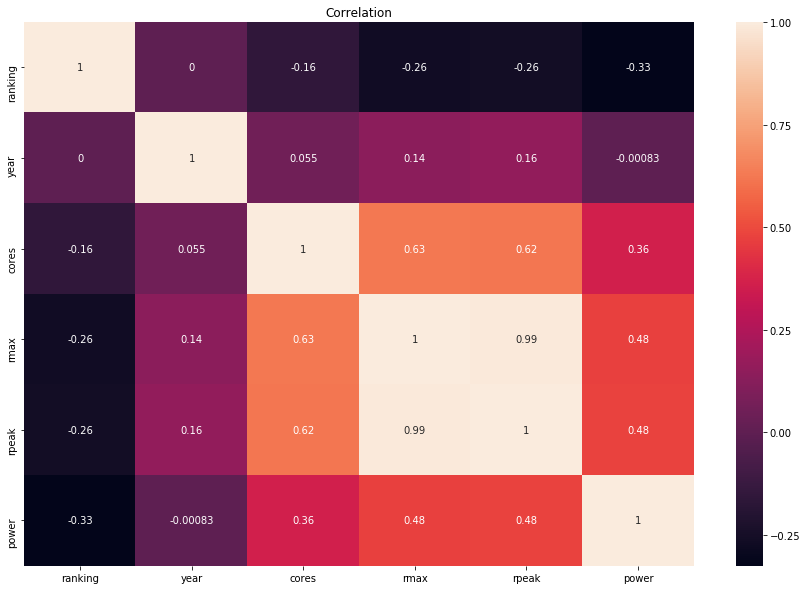

In [7]:
plt.figure(figsize=(15,10))
plt.title('Correlation')
sns.heatmap(df.corr(), annot=True);

# Is there a relationship between year and power?

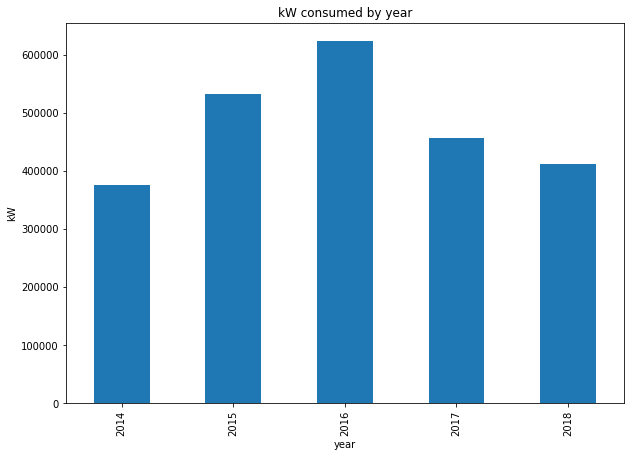

In [8]:
by_year=df.groupby('year').sum()
plt.figure(figsize=(10,7))
plt.title('kW consumed by year')
plt.ylabel('kW')
by_year.power.plot.bar();

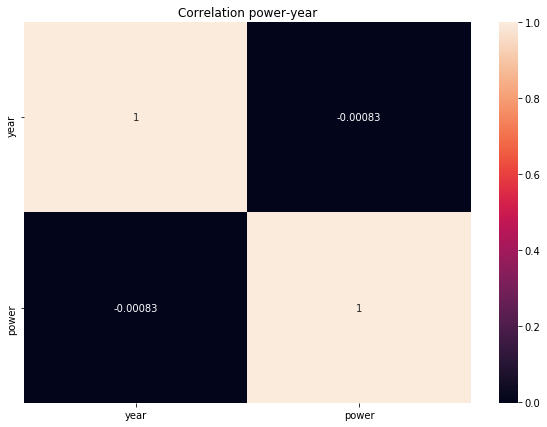

In [9]:
df_year_kw=df[['year', 'power']]
plt.figure(figsize=(10,7))
plt.title('Correlation power-year')
sns.heatmap(df_year_kw.corr(), annot=True);

Apparently, there is no correlation between year and consumed power, but from 2016 to 2018 the power needed for the top 500 supercomputers has descended, almost to 2014 levels.


# Is there a relationship between power and cores?

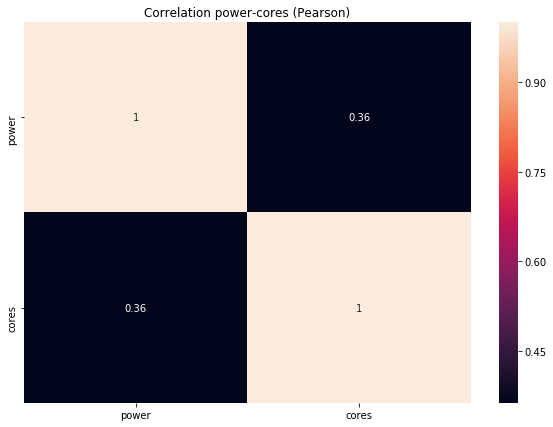

In [10]:
plt.figure(figsize=(10,7))
plt.title('Correlation power-cores (Pearson)')
sns.heatmap(df[['power', 'cores']].corr(method='pearson'), annot=True);

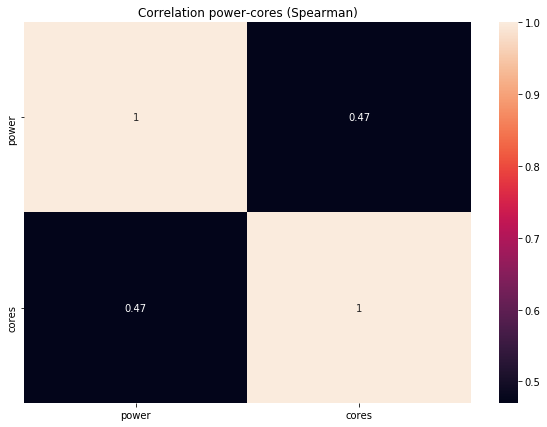

In [11]:
plt.figure(figsize=(10,7))
plt.title('Correlation power-cores (Spearman)')
sns.heatmap(df[['power', 'cores']].corr(method='spearman'), annot=True);

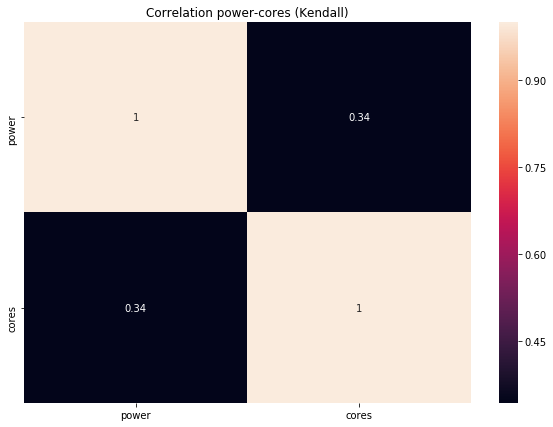

In [12]:
plt.figure(figsize=(10,7))
plt.title('Correlation power-cores (Kendall)')
sns.heatmap(df[['power', 'cores']].corr(method='kendall'), annot=True);

Seems like there is linear and non-linear correlation between power and cores, not much significant, but Pearson correlation in 0.36 and Spearman correlation in 0.47, meaning that to increase cores in a computer implies more power requeriments.

# Which is the company with more supercomputers?

In [13]:
df.company.value_counts().head()

HPE          696
Lenovo       338
Cray Inc.    289
IBM          243
Sugon        206
Name: company, dtype: int64

The 5 companies with more supercomputers are HPE, Lenovo, CRay Inc., IBM and Sugon.

# Which country have more computacional power?

In [14]:
by_country=df.groupby('country').sum().reset_index()
by_country.head()

,country,ranking,year,cores,rmax,rpeak,power
0,Australia,4837,46364,967490,20337.1,29281.6,11322
1,Austria,2112,14111,194792,3897.9,5130.2,3028
2,Belgium,576,4030,27552,749.4,836.8,400
3,Brazil,4589,28212,286384,5392.3,7279.4,11562
4,Bulgaria,388,2015,20700,264.2,412.3,0


In [15]:
by_country.loc[by_country.rmax==list(by_country.rmax.sort_values(ascending=False))[0]].country

36    United States
Name: country, dtype: object

In [16]:
by_country.loc[by_country.rpeak==list(by_country.rpeak.sort_values(ascending=False))[0]].country

6    China
Name: country, dtype: object

In [17]:
by_country.loc[by_country.cores==list(by_country.cores.sort_values(ascending=False))[0]].country

6    China
Name: country, dtype: object

The country with the highest R-Max is USA, but the country with more R-Peak and more cores is China.

# The computacional power has increased over the years?

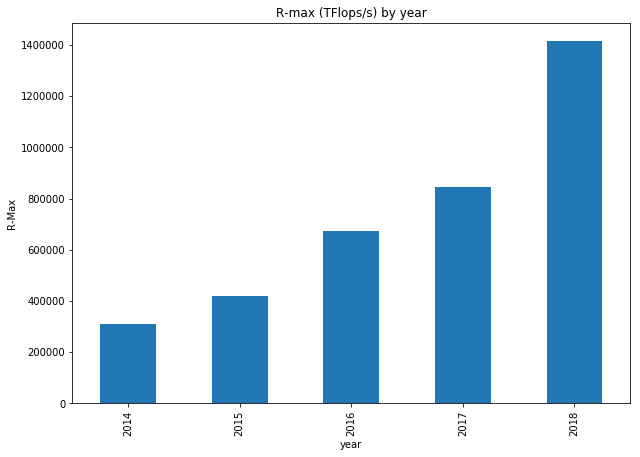

In [18]:
plt.figure(figsize=(10,7))
plt.title('R-max (TFlops/s) by year')
plt.ylabel('R-Max')
by_year.rmax.plot.bar();

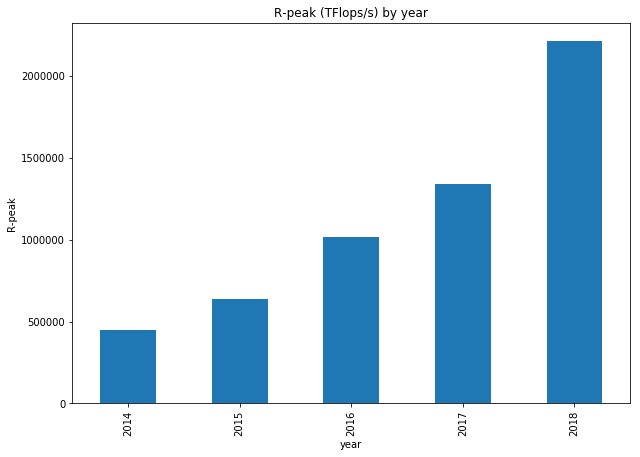

In [19]:
plt.figure(figsize=(10,7))
plt.title('R-peak (TFlops/s) by year')
plt.ylabel('R-peak')
by_year.rpeak.plot.bar();

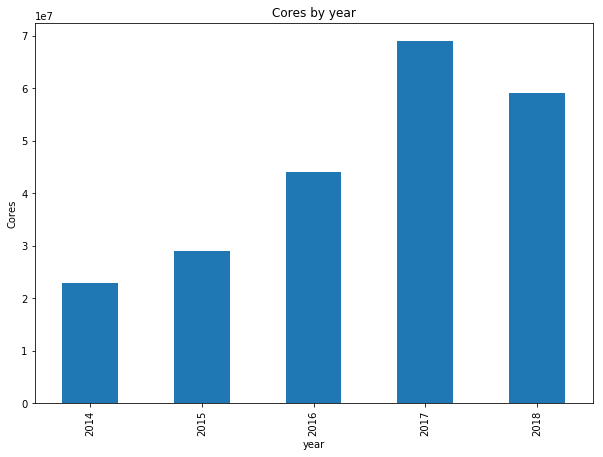

In [20]:
plt.figure(figsize=(10,7))
plt.title('Cores by year')
plt.ylabel('Cores')
by_year.cores.plot.bar();

R-Max and R-Peak are increasing over the years. However, the cores number in 2018 are less than in previous years.